In [1]:
1+1

2

In [ ]:
include("src/gravlens.jl")

In [19]:
y'' == 2 Fy/C^2
y'' == -2GM/C^2/r^3 * y
y'' == -K * y

K = 2GM/C^2/r^3 ==> M = K*C^2*r^3/(2G)

K*C^2*r^3/(2G) == 4/3 π r^3 ρ
K == 8/3 G π ρ / C^2

R = 5.0e5
V = 4/3*π*R^3
ρ = 1.0e6/V
K == 8/3*G*π*ρ/C^2

y0 = c1*sin(KS*x0)+c2*cos(KS*x0)
c1 = (y0-c2*c)/s

y'/KS = c1*c-c2*s
c2 = (c1*c-y'/KS)/s
c2 = y0*c/s^2-c2*c^2/s^2-y'/KS/s
c2 = (y0*c/s^2-y'/KS/s)/(1+c^2/s^2)

-1.7320508075688563

In [58]:
R = 5.0e5
V = 4/3*π*R^3
ρ = 1.0e6/V
K = 8/3*G*π*ρ/C^2
KS = sqrt(K)

x0 = -5.0e5
y0 = 4.0e5

c = cos(KS*x0)
s = sin(KS*x0)

@show c2 = (y0*c/s^2)/(1+c^2/s^2)
@show c1 = (y0-c2*c)/s;

c2 = ((y0 * c) / s ^ 2) / (1 + c ^ 2 / s ^ 2) = 399999.61718524323
c1 = (y0 - c2 * c) / s = -553.4000893103173


In [63]:
mfunc(r) = 4/3*π.*r.*r.*r.*ρ
rfunc(r) = ρ
const _x=-5.0e5
const _y=4.0e5
const _rs = sqrt(_x*_x+_y*_y)
const _Θ = abs(asin(_y/_rs));
const _ϕm = π-_Θ
const _tgα = 0.0;

nx, ny, u, du, ia, oa, da, θ =
    numeric_el(mfunc, rfunc, _Θ, _rs, _tgα, 100000; ϕm=_ϕm, reltol=1e-23, abstol=1e-23);

ay = c1*sin(KS*nx)+c2*cos(KS*nx);

function _phi_a(x,y)
    y += 400000.0
    r = sqrt(x*x+y*y)
    G*mfunc(r)/r
end
function _force_a(x,y)
    y += 400000.0
    const r = sqrt(x*x+y*y)
    const gmr3 = G*mfunc(r)/r/r/r
    gmr3*x, gmr3*y
end
fx, fy = fermat(_phi_a, _force_a, 500000.0, _tgα, 100000; abstol=1e-23, reltol=1e-23);
fy+=400000.0;

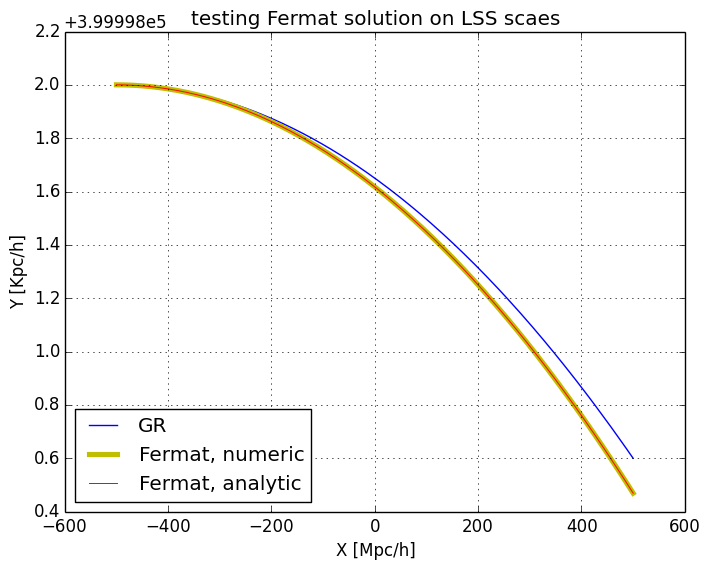

PyObject <matplotlib.text.Text object at 0x326d48290>

In [70]:
plot(nx/1e3,ny, label="GR")
hold(true)
plot(fx/1e3,fy,"-y",lw=3.7, label="Fermat, numeric")
plot(nx/1e3,ay,"-r",lw=0.7, label="Fermat, analytic")
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
grid(true)
legend(loc=3)
title("testing Fermat solution on LSS scaes")

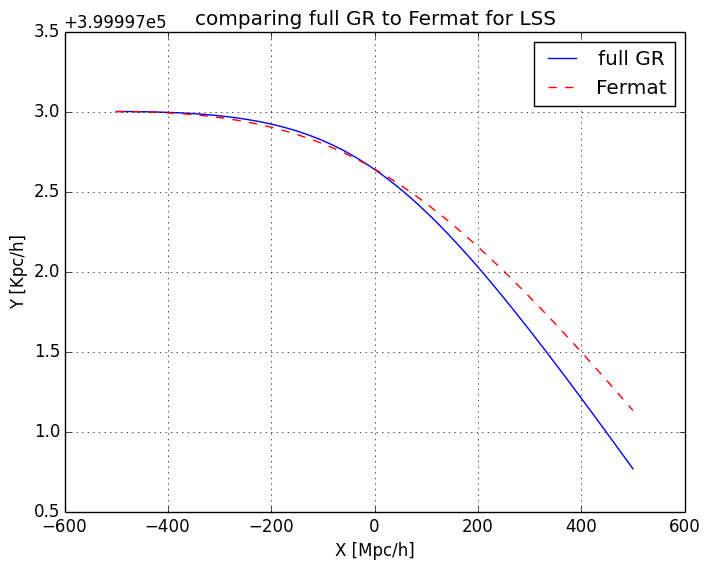

  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
in show at /Users/ariel/.julia/v0.5/PyPlot/src/PyPlot.jl


PyObject <matplotlib.text.Text object at 0x321bce590>

  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /Users/ariel/.julia/v0.5/IJulia/src/kernel.jl:35


In [3]:
const _x=-5.0e5
const _y=4.0e5
const _rs = sqrt(_x*_x+_y*_y)
const _Θ = abs(asin(_y/_rs));
const _ϕm = π-_Θ
const _tgα = 0.0;

nx, ny, u, du, ia, oa, da, θ =
    numeric_el(r->1.0e6, r->0.0, _Θ, _rs, _tgα, 100000; ϕm=_ϕm, reltol=1e-23, abstol=1e-23);
function _phi_4(x,y)
    y += 400000.0
    r = sqrt(x*x+y*y)
    G*1.0e6/r
end
function _force_4(x,y)
    y += 400000.0
    const r = sqrt(x*x+y*y)
    const gmr3 = G*1.0e6/r/r/r
    gmr3*x, gmr3*y
end

fx, fy = fermat(_phi_4, _force_4, 500000.0, _tgα, 100000; abstol=1e-23, reltol=1e-23);
fy+=400000.0;

hold(false)
plot(to_small(nx)/1e3,to_small(ny),label="full GR")
hold(true)
plot(to_small(fx)/1e3,to_small(fy),"--r", label="Fermat")
hold(false)
grid(true)
legend(loc=1)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
title("comparing full GR to Fermat for LSS")

In [15]:
G*1.0e6/4e5/C/C

1.1962963056425894e-6

In [17]:
0.2/4e5

5.0e-7

In [16]:
rg(1.0e6)/4e5

1.1962963056425894e-6

In [9]:
s = Spline1D(fx./1000.0,fy-4.0e5, k=5);
const dy_lens_lss = evaluate(s, 0.0)

-0.3591814406099728

In [30]:
z = 0.5;
mvir = 390.0;
concentration = 40.0;
rvir = RVIR(z, mvir);
rscale = rvir/concentration;

rs = 5.0e5;
b_up = 3.0;
b_down=3.3;
Θ = 0.0;
tgα_up = b_up/rs;
tgα_down = b_down/rs;
ϕm_up = π+atan(tgα_up)/4;

function phi(x,y)
    r = sqrt(x*x+y*y)
    tnfw_potential(mvir, rscale, r, rvir);
end
function force(x,y)
    const r = sqrt(x*x+y*y)
    const gmr3 = G*tnfw_m(mvir, rscale, r, rvir)/r/r/r
    gmr3*x, gmr3*y
end

function phi_lss(x,y)
    y_l1 = y-dy_lens_lss
    r = sqrt(x*x+y_l1*y_l1)
    p1 = tnfw_potential(mvir, rscale, r, rvir);
    y_l2 = y+400000.0
    r = sqrt(x*x+y_l2*y_l2)
    p2 = G*1.0e6/r
    p1+p2
end
function force_lss(x,y)
    y_l1 = y-dy_lens_lss
    r = sqrt(x*x+y_l1*y_l1)
    gmr3 = G*tnfw_m(mvir, rscale, r, rvir)/r/r/r
    fx1 = gmr3*x
    fy1 = gmr3*y_l1
    y_l2 = y+400000.0
    r = sqrt(x*x+y_l2*y_l2)
    gmr3 = G*1.0e6/r/r/r
    fx2 = gmr3*x
    fy2 = gmr3*y_l2
    fx1+fx2, fy1+fy2
end

nx_up, ny_up, u, du, ia, oa, da, θ =
numeric_tnfw_elVir(z, mvir, rscale, Θ, rs, tgα_up, 100000; ϕm=ϕm_up);
nx_down, ny_down, u, du, ia, oa, da, θ =
numeric_tnfw_elVir(z, mvir, rscale, Θ, rs, tgα_down, 100000);

tx_up, ty_up, u, tu, ia, oa, da, θ =
thin_tnfwVir(z, mvir, rscale, Θ, rs, tgα_up, 100000; ext=1.3);
tx_down, ty_down, u, tu, ia, oa, da, θ =
    thin_tnfwVir(z, mvir, rscale, Θ, rs, tgα_down, 100000);

fx_up, fy_up = fermat(phi, force, rs, tgα_up, 100000; abstol=1e-15, reltol=1e-15, ext=1.3);
fx_down, fy_down = fermat(phi, force, rs, tgα_down, 100000; abstol=1e-15, reltol=1e-15, ext=1.3);

lx_up, ly_up = fermat(phi_lss, force_lss, rs, tgα_up, 100000; abstol=1e-15, reltol=1e-15, ext=1.3);
lx_down, ly_down = fermat(phi_lss, force_lss, rs, -tgα_down, 100000; abstol=1e-15, reltol=1e-15, ext=1.3);


ny_down = -ny_down
ty_down = -ty_down
fy_down = -fy_down

nx_up,ny_up, nx_down,ny_down = extrapolate_to_meeting_same_side(nx_up,ny_up, nx_down,ny_down);
tx_up,ty_up, tx_down,ty_down = extrapolate_to_meeting_same_side(tx_up,ty_up, tx_down,ty_down);
fx_up,fy_up, fx_down,fy_down = extrapolate_to_meeting_same_side(fx_up,fy_up, fx_down,fy_down);
lx_up,ly_up, lx_down,ly_down = extrapolate_to_meeting_same_side(lx_up,ly_up, lx_down,ly_down);

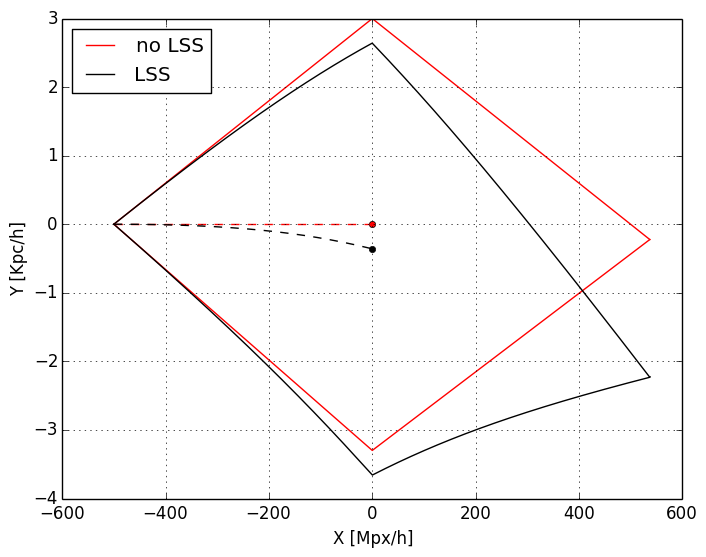

PyObject <matplotlib.text.Text object at 0x31af7d5d0>

In [31]:
hold(false)
plot(fx_up/1e3,fy_up,"-r", label="no LSS")
hold(true)
plot(fx_down/1e3,fy_down,"-r")

#plot(nx_up,ny_up,"-b")
#plot(nx_down,ny_down,"-g")

#plot(tx_up,ty_up,"--k")
#plot(tx_down,ty_down,"--k")

plot(lx_up/1e3,ly_up,"-k", label="LSS")
plot(lx_down/1e3,ly_down,"-k")

plot(0,0,"or",ms=5.0)
plot(0,dy_lens_lss,"ok",ms=5.0)

plot([-500000.0,0.0]/1e3,[0.0,0.0],"--r")
ixs=find(fx.<0.0)
plot(fx[ixs]/1e3,fy[ixs]-4.0e5,"--k")

grid(true)

legend(loc=2)
xlabel("X [Mpx/h]")
ylabel("Y [Kpc/h]")

In [32]:
dt = abs(time(phi, fx_up, fy_up) - time(phi, fx_down,fy_down))

9.519940391555792e-12

In [33]:
abs(dt)*9.8e8*365*24

81.72678427342817

In [34]:
dt_lss = abs(time(phi_lss, lx_up, ly_up) - time(phi_lss, lx_down,ly_down))

1.4945822357503857e-11

In [35]:
abs(dt_lss)*9.8e8*365*24

128.30689577469911

In [9]:
rg(1e6)/4e5

1.1962963056425894e-6

In [11]:
tgα

LoadError: LoadError: UndefVarError: tgα not defined
while loading In[11], in expression starting on line 1

In [12]:
0.36/4e5

9.0e-7